<a href="https://colab.research.google.com/github/mhtattersall/mhtattersall/blob/main/MatplotlibFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on lectures from Mayak Rassu (Udemy)

In [18]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
stocks = ["AMZN","MSFT","META","GOOG"] #META only listed from 2012
start = dt.datetime.today()-dt.timedelta(4200)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
for ticker in stocks: # looping over tickers and creating a dataframe with close prices
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
cl_price.dropna(axis=0,how='any',inplace=True) #drops rows (axis=0) with Nan values
print(cl_price)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  AMZN        MSFT        META        GOOG
Date                                                      
2012-05-18   10.692500   23.619814   38.230000   14.953949
2012-05-21   10.905500   24.007153   34.029999   15.295419
2012-05-22   10.766500   24.015228   31.000000   14.963912
2012-05-23   10.864000   23.490700   32.000000   15.179603
2012-05-24   10.762000   23.458416   33.029999   15.035145
...                ...         ...         ...         ...
2023-10-27  127.739998  329.809998  296.730011  123.400002
2023-10-30  132.710007  337.309998  302.660004  125.750000
2023-10-31  133.089996  338.109985  301.269989  125.300003
2023-11-01  137.000000  346.070007  311.850006  127.570000
2023-11-02  138.

In [6]:
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

In [7]:
# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

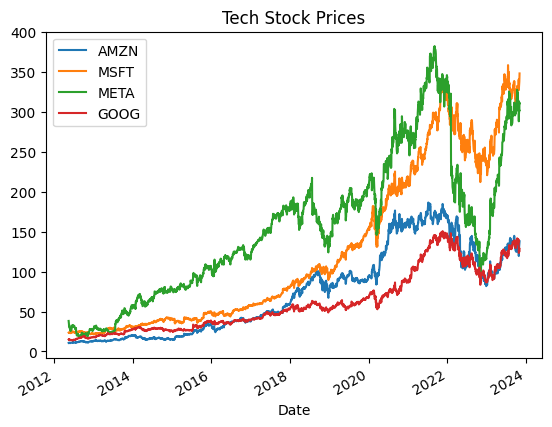

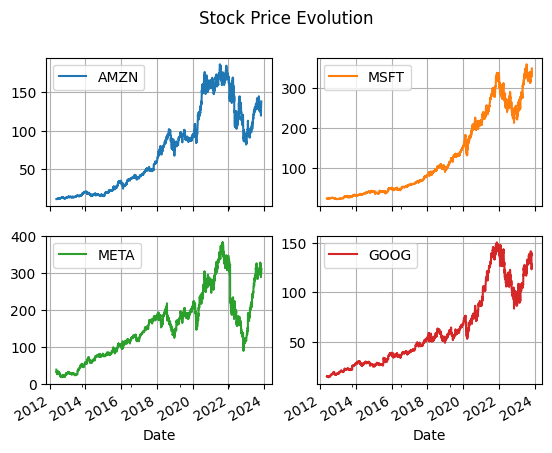

In [11]:
#plotting close prices
cl_price.plot(title = 'Tech Stock Prices')
cl_price.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True) # Subplots of the stocks

<Axes: title={'center': 'Stock Price Compounded Returns'}, xlabel='Date'>

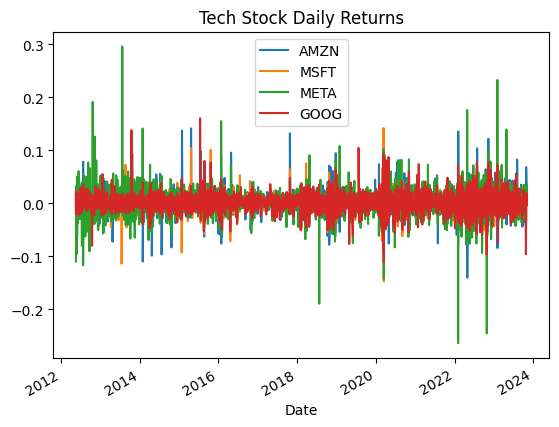

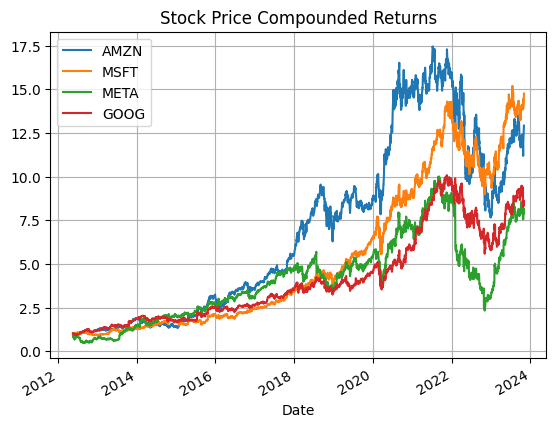

In [16]:
#plotting daily returns and cumulative returns
daily_return.plot(title = 'Tech Stock Daily Returns')
(1+daily_return).cumprod().plot(title = "Stock Price Compounded Returns", grid =True) #cumulative returns #cumprod = cumulative product #shows Tech Stocks are 10X

<BarContainer object of 4 artists>

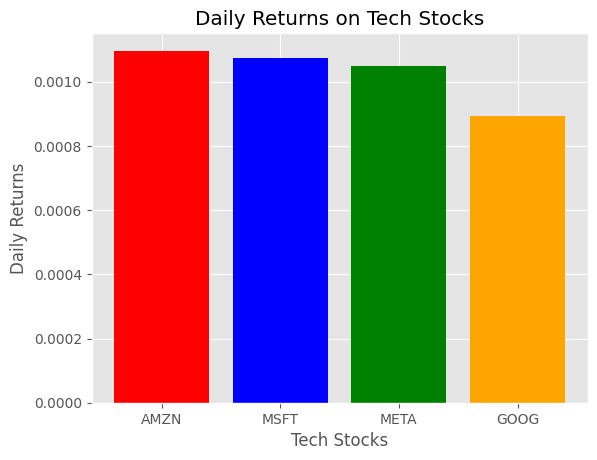

In [29]:
# Pyplot demo
fig, ax = plt.subplots() #unpacks figure(canvas) and axis(everything on the canvas) objects
plt.style.available #retrieve a list of available plot styles
plt.style.use('ggplot')
ax.set(title="Daily Returns on Tech Stocks", xlabel="Tech Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"])

<BarContainer object of 4 artists>

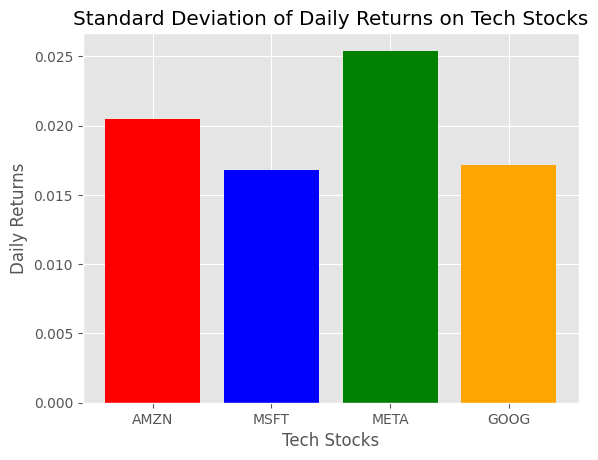

In [28]:
# Pyplot demo
fig, ax = plt.subplots() #unpacks figure(canvas) and axis(everything on the canvas) objects
plt.style.available #retrieve a list of available plot styles
plt.style.use('ggplot')
ax.set(title="Standard Deviation of Daily Returns on Tech Stocks", xlabel="Tech Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.std(),color=["red","blue","green","orange"])

In [ ]:
Link to Chris Moffitt blog: https://pbpython.com/effective-matplotlib.html
Matplotlib Tutorial: https://matplotlib.org/tutorials/introductory/lifecycle.html